#  **Deep Learning for Computer Vision**

### This deep neural network classifies images from the Fashion-MNIST dataset, a collection of 70,000 images of articles of clothing/accessories. It is split into a training set of 60,000 images and a test set of 10,000 images.

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from random import randint


mnist = keras.datasets.fashion_mnist  #Fashion-MNIST dataset of clothing images with 28x28 pixels per image


(x_train,y_train),(x_test,y_test) = mnist.load_data() 
x_train, x_test = x_train/255, x_test/255      


clothing_types = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', #Types of clothing (10 types)
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

X_train = []
X_test = []

for x in range(len(x_train)):
    X_train.append(x_train[x].reshape(len(x_train[x])**2,1))
    
for i in range(len(x_test)):
    X_test.append(x_test[i].reshape(len(x_test[i])**2,1))
    
X_train = np.array(X_train).squeeze()
X_test = np.array(X_test).squeeze()

y_train = y_train.reshape(len(y_train),1)
y_test = y_test.reshape(len(y_test),1)

m = X_train.shape[0]

n = X_train.shape[1]

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


##         A few examples of the images and labels in the dataset:

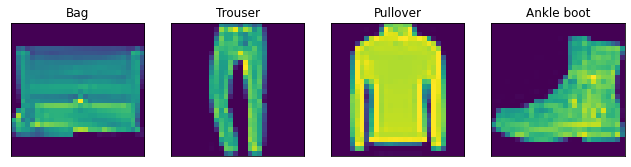

In [4]:
img1 = randint(0,m)
img2 = randint(0,m)
img3 = randint(0,m)
img4 = randint(0,m)

fig = plt.figure(figsize = (11,11))

ax1 = fig.add_subplot(1,4,1)
plt.title(clothing_types[int(y_train[img1])])
ax2 = fig.add_subplot(1,4,2)
plt.title(clothing_types[int(y_train[img2])])
ax3 = fig.add_subplot(1,4,3)
plt.title(clothing_types[int(y_train[img3])])
ax4 = fig.add_subplot(1,4,4)
plt.title(clothing_types[int(y_train[img4])])

ax1.imshow(x_train[img1])
ax2.imshow(x_train[img2])
ax3.imshow(x_train[img3])
ax4.imshow(x_train[img4])

for ax in [ax1,ax2,ax3,ax4]:
    ax.set_xticks([])
    ax.set_yticks([])
plt.show()

### This cell describes the neural network's architecture and randomly initializes the parameters. The neural network has an input layer of 784 neurons (corresponding to the 24x24 pixels each image contains), four hidden layers containing 500, 400, and 250, and 150 neurons, respectively, and the output layer with 10 neurons, for the 10 classes.

In [5]:
L0_units = n

L1_units = 500

L2_units = 400

L3_units = 250

L4_units = 150

L5_units = len(clothing_types)


W1 = np.random.randn(L1_units,L0_units)/np.sqrt(L0_units)

W2 = np.random.randn(L2_units,L1_units)/np.sqrt(L1_units)

W3 = np.random.randn(L3_units,L2_units)/np.sqrt(L2_units)

W4 = np.random.randn(L4_units,L3_units)/np.sqrt(L3_units)

W5 = np.random.randn(L5_units,L4_units)/np.sqrt(L4_units)


b1 = np.zeros((L1_units,1))

b2 = np.zeros((L2_units,1))

b3 = np.zeros((L3_units,1))

b4 = np.zeros((L4_units,1))

b5 = np.zeros((L5_units,1))


y_matrix = np.identity(len(clothing_types))

y_train_matrix = []

for y in range(len(y_train)):
    y_train_matrix.append(y_matrix[y_train[y]])
    
y_train_matrix = np.array(y_train_matrix)
y_train_matrix = y_train_matrix.squeeze()

y_test_matrix = []

for y in range(len(y_test)):
    y_test_matrix.append(y_matrix[y_test[y]])
    
y_test_matrix = np.array(y_train_matrix)
y_test_matrix = y_test_matrix.squeeze()

### The following functions include functions used to train the model through forward and backward propagation and gradient descent, as well as one used to predict the class of a given image. The network uses ReLU activation functions for the hidden layer and softmax activation for the output.

In [6]:
def softmax(x):
    return np.exp(x)/np.sum(np.exp(x))



def forward_propagation(X,w1,w2,w3,w4,w5,b1,b2,b3,b4,b5):
    
    Z1 = np.matmul(w1,X.T) + b1
    
    A1 = np.maximum(0,Z1)
    
    Z2 = np.matmul(w2,A1) + b2
    
    A2 = np.maximum(0,Z2)
    
    Z3 = np.matmul(w3,A2) + b3
    
    A3 = np.maximum(0,Z3)
    
    Z4 = np.matmul(w4,A3) + b4 

    A4 = np.maximum(0,Z4)
    
    Z5 = np.matmul(w5,A4)
    
    Z5 = Z5.T
    
    y_hat = np.zeros(Z5.shape)                
    
    for i in range(len(y_hat)):
        y_hat[i] = softmax(Z5[i]) 
        
    Z5 = Z5.T
        
    y_hat = y_hat.T
    
    
    return A1, A2, A3, A4, Z1, Z2, Z3, Z4, Z5, y_hat



def back_propagation(X, Y_matrix, w1, w2, w3, w4, w5, b1, b2, b3, b4, b5):
    
    m = len(X)
    
    A1, A2, A3, A4, Z1, Z2, Z3, Z4, Z5, y_hat = forward_propagation(X,w1,w2,w3,w4,w5,b1,b2,b3,b4,b5)
    
    
    dZ5 = y_hat - Y_matrix.T 
    
    dW5 = np.matmul(dZ5,A4.T)/m
    
    db5 = np.sum(dZ5, axis = 1, keepdims = True)/m
    
    
    dZ4 = np.matmul(w5.T,dZ5) * (Z4 > 0)
    
    dW4 = np.matmul(dZ4,A3.T)/m
    
    db4 = np.sum(dZ4, axis = 1, keepdims = True)/m
    
    
    dZ3 = np.matmul(w4.T,dZ4) * (Z3 > 0)
    
    dW3 = np.matmul(dZ3,A2.T)/m  
    
    db3 = np.sum(dZ3, axis = 1, keepdims = True)/m
    
    
    dZ2 = np.matmul(w3.T,dZ3) * (Z2 > 0)
    
    dW2 = np.matmul(dZ2,A1.T)/m
    
    db2 = np.sum(dZ2, axis = 1, keepdims = True)/m
    

    dZ1 = np.matmul(w2.T,dZ2) * (Z1 > 0)
    
    dW1 = np.matmul(dZ1,X)/m
    
    db1 = np.sum(dZ1, axis = 1, keepdims = True)/m
    
    
    gradients = {'dW1':dW1,'dW2':dW2,'dW3':dW3,'dW4':dW4,'dW5':dW5,'db1':db1,'db2':db2,'db3':db3,'db4':db4,'db5':db5}
    
    return gradients



def gradient_descent(W1,W2,W3,W4,W5,b1,b2,b3,b4,b5,gradients,alpha):
    
    W1 = W1 - alpha * gradients['dW1']
    
    W2 = W2 - alpha * gradients['dW2']
    
    W3 = W3 - alpha * gradients['dW3']
    
    W4 = W4 - alpha * gradients['dW4']
    
    W5 = W5 - alpha * gradients['dW5']
    
    b1 = b1 - alpha * gradients['db1']
    
    b2 = b2 - alpha * gradients['db2']
    
    b3 = b3 - alpha * gradients['db3']
    
    b4 = b4 - alpha * gradients['db4']
    
    return W1, W2, W3, W4, W5, b1, b2, b3, b4, b5



def predict(df,row, W1, W2, W3, W4, W5, b1, b2, b3, b4, b5):
    
    n = len(df[row])
    
    image = df[row].reshape(n,1)
    
    z1 = np.matmul(W1,image) + b1
    
    a1 = np.maximum(0,z1)
    
    z2 = np.matmul(W2,a1) + b2
    
    a2 = np.maximum(0,z2)
    
    z3 = np.matmul(W3,a2) + b3
    
    a3 = np.maximum(0,z3)
    
    z4 = np.matmul(W4,a3) + b4

    a4 = np.maximum(0,z4)
    
    z5 = np.matmul(W5,a4) + b5
    
    y_hat = list(softmax(z5))
    
    prediction = y_hat.index(max(y_hat))
    
    return prediction



def cost(x, y_matrix, w1, w2, w3, w4, w5, b1, b2, b3, b4, b5):
        
    A1, A2, A3, A4, Z1, Z2, Z3, Z4, Z5, y_hat = forward_propagation(x, w1, w2, w3, w4, w5, b1, b2, b3, b4, b5)
        
    y_hat = y_hat.T
    
    J = -np.sum(y_matrix * np.log(y_hat) + (1 - y_matrix) * np.log(1 - y_hat))/len(x)
    
    return J

### The neural network is ready to be trained using the training examples. The while loop iterates though 3,500 steps of gradient descent (it can take some time.)

In [7]:
iterations = 0
    
while iterations < 3500:
                
    gradients = back_propagation(X_train, y_train_matrix, W1,W2,W3,W4,W5,b1,b2,b3,b4,b5)
    
    W1, W2, W3, W4, W5, b1, b2, b3, b4, b5 = gradient_descent(W1,W2,W3,W4,W5,b1,b2,b3,b4,b5,gradients,.1)
    
    iterations += 1

In [8]:
train_data_predictions = []

train_data_actual = []

for i in range(m):
    
    p = predict(X_train, i, W1, W2, W3, W4, W5, b1, b2, b3, b4, b5)
    y = int(y_train[i])
    
    train_data_predictions.append(p)
    train_data_actual.append(y)
    
    
test_data_predictions = []

test_data_actual = []


for i in range(X_test.shape[0]):
    
    p = predict(X_test, i, W1, W2, W3, W4, W5, b1, b2, b3, b4, b5)
    y = int(y_test[i])
    
    test_data_predictions.append(p)
    test_data_actual.append(y)

###  Finally, we can see how well the neureal network performed on both the training set and the test set.

In [9]:
train_accuracy = accuracy_score(train_data_actual,train_data_predictions)

test_accuracy = accuracy_score(test_data_actual,test_data_predictions)

print('Accuracy on training set: ' + str(round(train_accuracy,2)))
print('\nAccuracy on test set: ' + str(round(test_accuracy,2)))

Accuracy on training set: 0.92

Accuracy on test set: 0.88
